In [35]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df=pd.merge(ride_data_df,city_data_df,how='left', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [36]:
#Combine data from both files
combined_df_agg=combined_df.groupby(['city','type','driver_count']).agg({'fare':"mean",
                                                       'ride_id':"count"},as_index = False)
combined_df_agg=combined_df_agg.rename(columns={"fare": "avg_fare", "ride_id": "ride_count"})
#Assign it to new dataframe
new_df = pd.DataFrame({'avg_fare':combined_df_agg['avg_fare'],
                       'ride_count':combined_df_agg['ride_count']}
                       ).reset_index()
new_df.head()

,city,type,driver_count,avg_fare,ride_count
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


## Bubble Plot of Ride Sharing Data

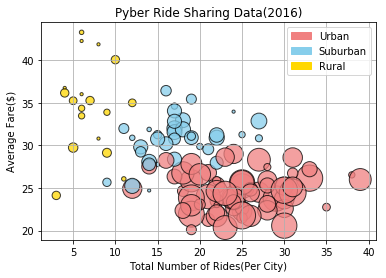

In [37]:
# Obtain the x and y coordinates for each of the three city types
x=new_df['ride_count']
y=new_df['avg_fare']
z=new_df['type']
# Function to map the colors as a list from the input list of city type
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Urban':
            cols.append('lightcoral')
        elif l=='Suburban':
            cols.append('skyblue')
        elif l=='Rural':
            cols.append('gold')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(z)

# Build the scatter plots for each city types
plt.scatter(x=x,y=y,s=10*new_df['driver_count'],c=cols,marker="o", alpha=0.75, edgecolors='black') 

# Incorporate the other graph properties
plt.grid(True)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
red_patch = mpatches.Patch(color='lightcoral', label='Urban')
blue_patch = mpatches.Patch(color='skyblue', label='Suburban')
yellow_patch = mpatches.Patch(color='gold', label='Rural')
plt.legend(handles=[red_patch,blue_patch,yellow_patch])

# Incorporate a text label regarding circle size
# Save Figure
plt.savefig("pyber_ride_sharing_data.png")
#Pass on the list created by the function here
plt.show()

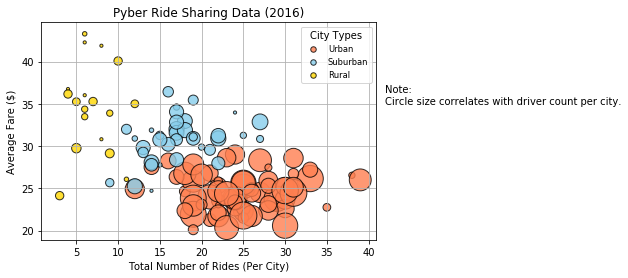

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

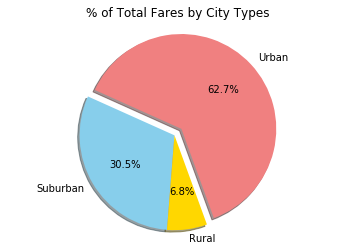

In [38]:
# Calculate Type Percents
total_fare=sum(combined_df['fare'])
urban_fare_percent=(sum(combined_df.loc[combined_df['type']=='Urban']['fare'])/total_fare)*100
suburban_fare_percent=(sum(combined_df.loc[combined_df['type']=='Suburban']['fare'])/total_fare)*100
rural_fare_percent=(sum(combined_df.loc[combined_df['type']=='Rural']['fare'])/total_fare)*100

# Data to plot
sizes = [urban_fare_percent, suburban_fare_percent, rural_fare_percent]
labels = 'Urban', 'Suburban', 'Rural'
colors = ['lightcoral', 'skyblue', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=290)
plt.title("% of Total Fares by City Types") 
plt.axis('equal')

# Save Figure
plt.savefig("Total_Fares_by_City_Types.png")
plt.show()

## Total Rides by City Type

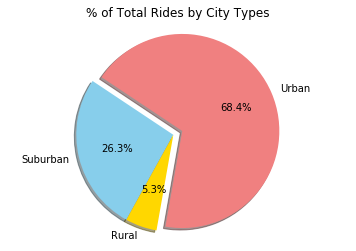

In [39]:
# Calculate Ride Percents
total_rides=len(combined_df['ride_id'])
urban_ride_percent=(len(combined_df.loc[combined_df['type']=='Urban']['ride_id'])/total_rides)*100
suburban_ride_percent=(len(combined_df.loc[combined_df['type']=='Suburban']['ride_id'])/total_rides)*100
rural_ride_percent=(len(combined_df.loc[combined_df['type']=='Rural']['ride_id'])/total_rides)*100

# Build Pie Chart
sizes = [urban_ride_percent, suburban_ride_percent, rural_ride_percent]
labels = 'Urban', 'Suburban', 'Rural'
colors = ['lightcoral', 'skyblue', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=260)
plt.title("% of Total Rides by City Types") 
plt.axis('equal')
# Save Figure
plt.savefig("Total_Rides_by_City_Types.png")
plt.show()

## Total Drivers by City Type

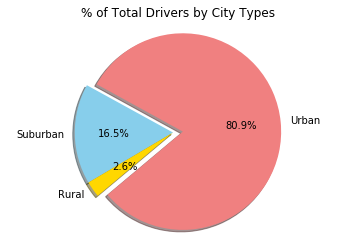

In [40]:
# Calculate Driver Percents
total_drivers=sum(new_df['driver_count'])
urban_driver_percent=(sum(new_df.loc[new_df['type']=='Urban']['driver_count'])/total_drivers)*100
suburban_driver_percent=(sum(new_df.loc[new_df['type']=='Suburban']['driver_count'])/total_drivers)*100
rural_driver_percent=(sum(new_df.loc[new_df['type']=='Rural']['driver_count'])/total_drivers)*100

# Build Pie Chart
sizes = [urban_driver_percent, suburban_driver_percent, rural_driver_percent]
labels = 'Urban', 'Suburban', 'Rural'
colors = ['lightcoral', 'skyblue', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=220)
plt.title("% of Total Drivers by City Types") 
plt.axis('equal')
# Save Figure
plt.savefig("Total_Drivers_by_City_Types.png")
plt.show()